base on https://sebastianraschka.com/Articles/2014_python_lda.html

#### PCA introduction
The main purposes of a `principal component analysis` are the analysis of data to identify patterns and finding patterns to `reduce the dimensions` of the dataset with minimal loss of information.

#### PCA vs MDA(Multiple Discriminant Analysis)
- Both Multiple Discriminant Analysis (MDA) and Principal Component Analysis (PCA) are `linear transformation methods` and closely related to each other. In PCA, we are interested to find the `directions` (components) that `maximize the variance` in our dataset, where in MDA, we are additionally interested to find the `directions` that `maximize the separation` (or discrimination) between different classes (for example, in pattern classification problems where our dataset consists of multiple classes. In contrast two PCA, which ignores the class labels).
- In other words, via PCA, we are projecting the entire set of data `(without class labels)` onto a different subspace, and in MDA, we are trying to determine a suitable subspace to distinguish between patterns that `belong to different classes.` Or, roughly speaking in PCA we are trying to find the axes with maximum variances where the data is most spread (within a class, since PCA treats the whole data set as one class), and in MDA we are additionally maximizing the spread between classes.

#### Summarizing the PCA approach
- Take the whole dataset consisting of d-dimensional samples `ignoring the class labels`
- Compute the d-dimensional `mean vector` (i.e., the means for every dimension of the whole dataset)
- Compute the scatter matrix (alternatively, the `covariance matrix`) of the whole data set
- Compute `eigenvectors` (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd)
- Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the `largest eigenvalues` to form a d×k dimensional matrix WW(where every column represents an eigenvector)
- Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: yy=WWT×xx (where xx is a d×1-dimensional vector representing one sample, and yy is the transformed k×1-dimensional sample in the new subspace.)

In [4]:
import numpy as np

np.random.seed(1) # random seed for consistency
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
class1_sample.reshape(3,20)

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
class2_sample.reshape(3,20)

array([[ 0.24560206,  0.70190716,  2.13162939, -0.39649634,  1.16003707,
        -1.02220122,  1.23009474,  0.79924193,  1.19829972,  1.37756379,
         2.19891788,  0.36126959,  0.65614632,  1.69803203,  1.40349164,
         1.16938243,  0.73378149,  1.31515939,  1.35054598, -0.61577235],
       [ 2.25286816,  1.48851815,  2.51981682, -0.44411381,  1.87616892,
         0.69379599,  1.76201118,  1.18656139,  1.11900865,  1.12182127,
         1.18515642,  1.42349435,  1.04359686,  0.55287144,  1.59357852,
         1.74055645,  1.03261455,  1.84616065, -0.31228341,  2.12141771],
       [ 1.51292982,  0.92442829,  3.18557541,  0.49553414,  1.31563495,
         1.82797464,  0.77767186,  1.41005165,  0.32933771,  2.12948391,
         0.62471505,  1.07734007,  0.37999916,  2.2245077 , -0.09491185,
         0.0462994 , -0.37311732,  0.14048406,  0.96130449,  1.40890054]])

### Generating some 3-dimensional sample data

Populating the interactive namespace from numpy and matplotlib


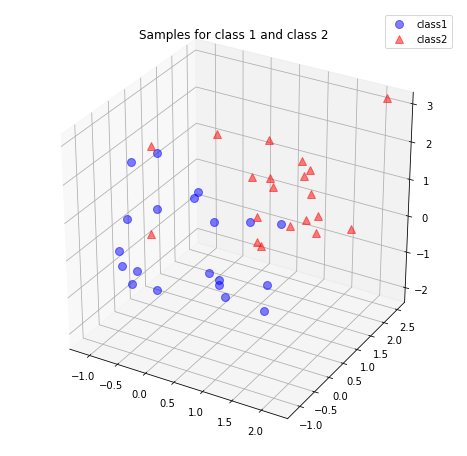

In [5]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

### Taking the whold dataset ignoring the class labels

In [7]:
all_samples = np.concatenate((class1_sample,class2_sample),axis=1)
all_samples.reshape(3,40)#The matrix has not the dimensions 3*40
all_samples.shape

(3, 40)

### Computing the d-dimensional mean vector

In [10]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print('Mean vector:\n ',mean_vector)

Mean vector:
  [[0.41667492]
 [0.69848315]
 [0.49242335]]


### Computing the Scatter Matrix(Covariance matrix)

In [20]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)
print('Scatter Matrix shape:\n', scatter_matrix.shape)

Scatter Matrix:
 [[38.4878051  10.50787213 11.13746016]
 [10.50787213 36.23651274 11.96598642]
 [11.13746016 11.96598642 49.73596619]]
Scatter Matrix shape:
 (3, 3)


In [21]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)
print('Covariance Matrix shape:\n', cov_mat.shape)

Covariance Matrix:
 [[0.9868668  0.26943262 0.2855759 ]
 [0.26943262 0.92914135 0.30682016]
 [0.2855759  0.30682016 1.27528118]]
Covariance Matrix shape:
 (3, 3)


### Computing eigenvectors and corresponding eigenvalues
- To show that the eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix, Also, we will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix. 

In [13]:
eig_val_sc , eig_vec_sc = np.linalg.eig(scatter_matrix)
eig_val_cov , eig_vec_cov = np.linalg.eig(cov_mat)

In [19]:
eig_val_sc, eig_vec_sc

(array([65.16936779, 32.69471296, 26.59620328]),
 array([[-0.49210223, -0.64670286,  0.58276136],
        [-0.47927902, -0.35756937, -0.8015209 ],
        [-0.72672348,  0.67373552,  0.13399043]]))

In [22]:
eig_val_cov, eig_vec_cov

(array([1.67100943, 0.83832597, 0.68195393]),
 array([[-0.49210223, -0.64670286,  0.58276136],
        [-0.47927902, -0.35756937, -0.8015209 ],
        [-0.72672348,  0.67373552,  0.13399043]]))

In [14]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.49210223]
 [-0.47927902]
 [-0.72672348]]
Eigenvalue 1 from scatter matrix: 65.16936779078195
Eigenvalue 1 from covariance matrix: 1.6710094305328695
Scaling factor:  39.00000000000002
----------------------------------------
Eigenvector 2: 
[[-0.64670286]
 [-0.35756937]
 [ 0.67373552]]
Eigenvalue 2 from scatter matrix: 32.69471296321796
Eigenvalue 2 from covariance matrix: 0.8383259734158451
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[ 0.58276136]
 [-0.8015209 ]
 [ 0.13399043]]
Eigenvalue 3 from scatter matrix: 26.596203282097097
Eigenvalue 3 from covariance matrix: 0.6819539303101816
Scaling factor:  39.00000000000002
----------------------------------------


How to use assertions to help automatically detect errors in your Python programs in order to make them more reliable and easier to debug.

### Sorting the eigenvectors by decresing eigenvalues
- We started with the goal to reduce the dimensionality of our feature space, i.e., projecting the feature space via PCA onto a smaller subspace, where the eigenvectors will form the axes of this new feature subspace. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which we can confirm by the following code:

In [23]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [24]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

65.16936779078195
32.69471296321796
26.596203282097097


### Choosing k eigenvectors with the largest eigenvalues
- For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix WW.

In [25]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


### Transforming the samples onto the new subspace
- In the last step, we use the 2×3-dimensional matrix WW that we just computed to transform our samples onto the new subspace via the equation yy=WWT×xx.

In [26]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

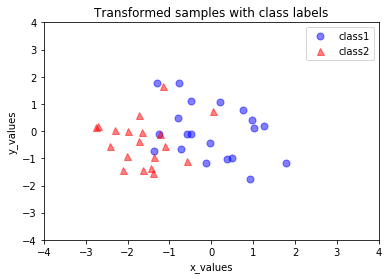

In [27]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

### Using the PCA() class from the sklearn.decomposition library to confirm our results

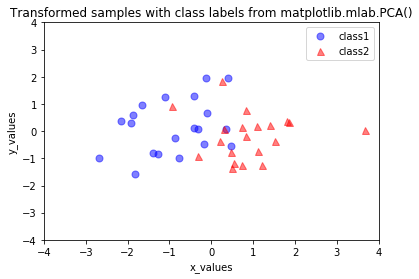

In [28]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

#### LDA introduction
Linear Discriminant Analysis (LDA) is most commonly used as `dimensionality reduction` technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to `project` a dataset onto a lower-dimensional space with good class-separability in order `avoid overfitting` (“curse of dimensionality”) and also reduce `computational costs`.